In [1]:
#IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression



In [2]:
# IMPORTING THE DATA
rawdata = pd.read_csv("1.04. Real-life example.csv")
rawdata.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [3]:
#PREPROCESSING, DROPPING "MODEL" FROM THE DATA BECAUSE IT NOT RELEVANT FOR NOW
data = rawdata.drop(["Model"], axis =1)
data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [4]:
#DEALING WITH MISSING VALUE
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [5]:
#DROPPING MISSING VALUES
datar = data.dropna(axis =0)
datar.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

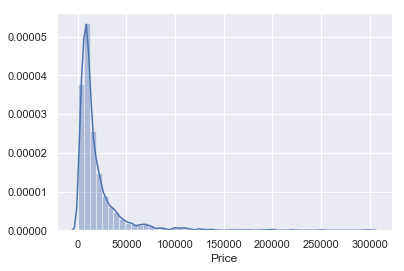

In [6]:
#EXPLOYING THE PDF
sns.distplot(datar["Price"])

In [7]:
#DEALING WITH OUTLIERS BY DECLARING A VARIABLE "q"
q = datar["Price"].quantile(0.99)
data1 =datar[datar["Price"]<q]
data1.describe(include = "all")


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


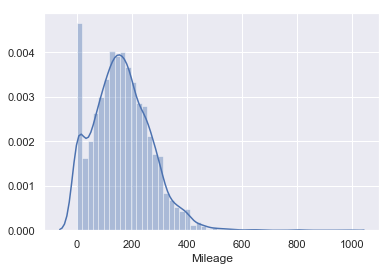

In [8]:
sns.distplot(datar["Mileage"])

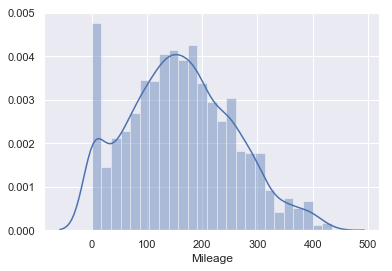

In [9]:
q = data1["Mileage"].quantile(0.99)
data2 = data1[data1["Mileage"]<q]
sns.distplot(data2["Mileage"])

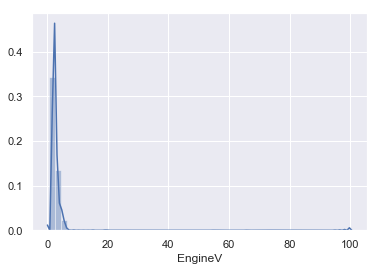

In [10]:
sns.distplot(data2["EngineV"])

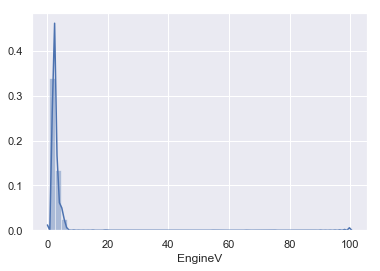

In [11]:
sns.distplot(datar["EngineV"])

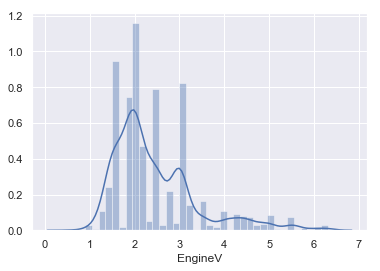

In [12]:

data3 = data2[data2["EngineV"]<6.5]
data3.describe(include="all")
sns.distplot(data3["EngineV"])

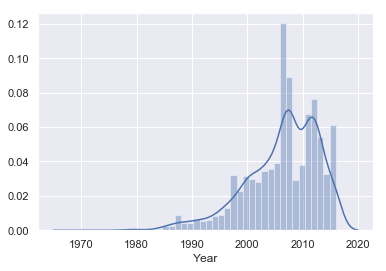

In [13]:
sns.distplot(data3["Year"])

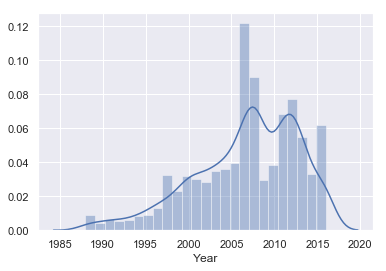

In [14]:
q =data3["Year"].quantile(0.01)
data4 = data3[data3["Year"]>q]
sns.distplot(data4["Year"])

In [15]:
datacl = data4.reset_index(drop = True)

In [16]:
datacl.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


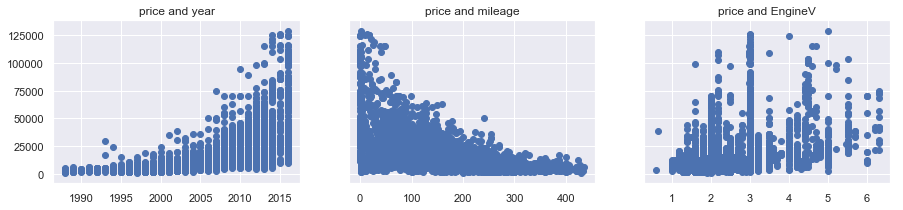

In [17]:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter (datacl["Year"],datacl["Price"])
ax1.set_title("price and year")
ax2.scatter(datacl["Mileage"],datacl["Price"])
ax2.set_title("price and mileage")
ax3.scatter(datacl["EngineV"],datacl["Price"])
ax3.set_title("price and EngineV")
plt.show()

In [18]:
logprice = np.log(datacl["Price"])
datacl["logprice"] = logprice
datacl.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,logprice
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


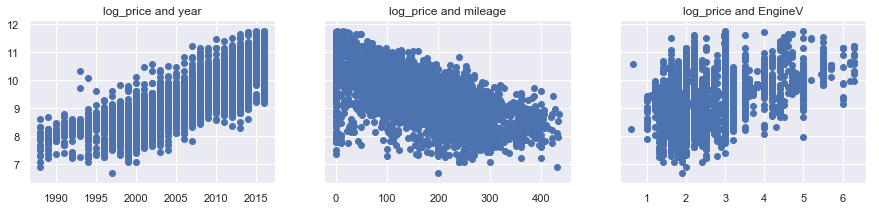

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter (datacl["Year"],datacl["logprice"])
ax1.set_title("log_price and year")
ax2.scatter(datacl["Mileage"],datacl["logprice"])
ax2.set_title("log_price and mileage")
ax3.scatter(datacl["EngineV"],datacl["logprice"])
ax3.set_title("log_price and EngineV")
plt.show()

In [20]:
datacl.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'logprice'], dtype=object)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
variables = datacl[["Year","EngineV","Mileage",]]

In [23]:
vif =pd.DataFrame()

In [24]:
vif["VIF"]= [variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif["Feature"] = variables.columns

In [25]:
vif

,VIF,Feature
0,10.354854,Year
1,7.662068,EngineV
2,3.791584,Mileage


In [26]:
datacl = datacl.drop(["Price"],axis=1)
datacl.describe(include = "all")

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,logprice
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


In [27]:
#INCLUDING THE CATEGORICAL DATA IN THE REGRESSION BY CREATING DUMMIES
dataDummies = pd.get_dummies(datacl, drop_first = True)
dataDummies.head()

,Mileage,EngineV,Year,logprice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [28]:
#CHECKING THE VARIABLES
dataDummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'logprice', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [29]:
#RE-ORDERING THE VARIABLES
col = [ 'logprice', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']


In [30]:
dataprep = dataDummies[col]
dataprep.head()

,logprice,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [31]:
#COMPUTING THE LINEAR REGRESSION, WE DECLARE THE LOG_PRICE AS THE "TARGET". WHILE THE OTHERS AS "INPUT"
target = dataprep["logprice"]
inputs = dataprep.drop(["logprice"], axis =1)


In [32]:
#SCALING THE DATA
scaler = StandardScaler()
scaler.fit(inputs)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
inputs_scaled =scaler.transform(inputs)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [34]:
#TRAIN-TEST-SPLIT THE MODEL IN 80-20 USING RANDOM STATE AS 365
x_train,x_test,y_train,y_test =train_test_split(inputs_scaled, target, test_size =0.2, random_state =365)

In [35]:
#CREATE LINEAR REGRESSION OBJECT AND CREATE A TRAIN INPUT AND TARGET
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
# CHECKING THE OUTPUT OF THE REGRESSION AND STORING THEM IN y_hat
y_dat = reg.predict(x_train)

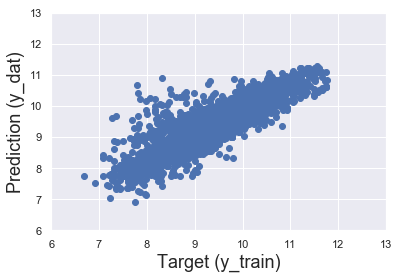

In [37]:
# TO COMPARE THE TARGET "y_train" AND THE PREDICTION "y_hat" WE PLOT THEM ON A GRAPH
# AND THE CLOSER THEY ARE TO 45 DEGREE THE BETTER THE PREDICTION
plt.scatter(y_train,y_dat)
plt.xlabel("Target (y_train)", size =18)
plt.ylabel("Prediction (y_dat)", size =18)
#SCALING THE X AND Y AXIS THE SAME
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

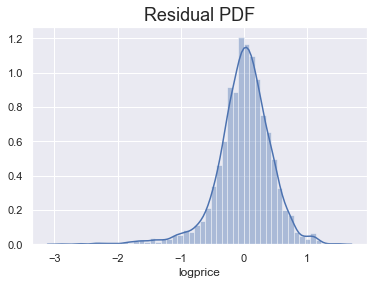

In [38]:
# ANOTHER CHECK FOR THE MODEL IS THE RESIDUAL PLOT
sns.distplot(y_train - y_dat)
plt.title("Residual PDF", size =18)


In [39]:
# FINDING THE R_SQUARD OF THE MODEL
reg.score(x_train,y_train)

0.744996578792662

In [40]:
#FINDING THE WEIGHTS AND BIAS
reg.intercept_

9.415239458021299

In [41]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [42]:
#CREATING A REGRESSION SUMMARY, WHERE THE CAN COMPARE
reg_summary =pd.DataFrame(inputs.columns.values, columns =["features"])
reg_summary["weights"] =reg.coef_
reg_summary

,features,weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [43]:
# TO CHECKING THE "BRANDS"
datacl["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [44]:
#TESTING
#OUR TEST INPUT x_test AND OUTPUT y_test, WE NOT BE USED TO TRAIN THE MODEL BUT TO BE FEED AND FIND THE PREDICTION
y_dat_test =reg.predict(x_test)

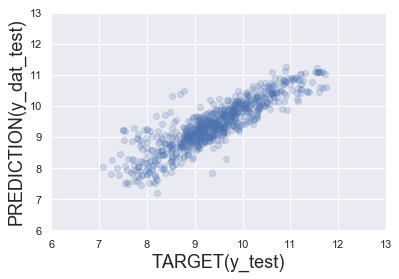

In [45]:
# PLOTING A SCATTER GRAPH WITH THE WITH TEST TARGET "y_test" AND THE PRDICTION "y_dat_test"
plt.scatter(y_test, y_dat_test, alpha =0.2)
plt.xlabel("TARGET(y_test)", size =18)
plt.ylabel("PREDICTION(y_dat_test)", size =18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [46]:
#TO CHECK THE ACTUAL PRICE WE TAKE THE EXPONENTIALS OF THE PRICE_LOG
dp_pf =pd.DataFrame(np.exp(y_dat_test), columns=["Predictions"])
dp_pf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [47]:
#REINDEXING 
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: logprice, dtype: float64

In [48]:
#INCLUDING THE TEST TARGET IN THE DATA FRAME
dp_pf ["Target"]=np.exp(y_test)
dp_pf

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
5,21289.799394,20000.0
6,20159.189144,38888.0
7,20349.617702,16999.0
8,11581.537864,12500.0
9,33614.617349,41000.0


In [51]:
#THE DIFFERENCE BETWEEN THE 'TARGET' AND 'PRDICTION' IS THE RESIDUAL
dp_pf["Residual"] =dp_pf["Target"] - dp_pf["Predictions"]

In [53]:
#TAKING THE ABSOLUTE DIFFERENCE TO INDICATE HOW FAR WE ARE FROM THE RESULT PERCENTAGE-WISE
dp_pf['Difference%'] = np.absolute(dp_pf["Residual"]/dp_pf["Target"]*100)
dp_pf.head()


,Predictions,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859


In [54]:
#EXPLORING THE DESCRIPTIVE 
dp_pf.describe()

,Predictions,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [56]:
#CHECKING THE OUTPUT USING PANDAS SYNTAX
pd.options.display.max_rows = 999

In [59]:
#MAKING THE RESULT CLEARER WE ROUND UP TO 2 DECIMAL PLACE
pd.set_option("display.float_format", lambda x: "%.2f" % x )


In [62]:
#FINALLY WE SORT THE DIFFERENCE IN % AND A MANUALLY CHECK THE MODEL
dp_pf.sort_values(by=["Difference%"])

,Predictions,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
